In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install statsmodels==0.13.0
!pip install pmdarima

     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 5.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import missingno

import scipy as sp

# TIME SERIES
from statsmodels.tsa.arima.model import ARIMA # v 0.13.0
#from statsmodels.tsa.arima_model import ARIMA #v 0.12.1
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf,arma_order_select_ic
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
import glob

#get all csv file names
filepath='Datafor555/HI'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
li = []
for filename in all_files:
    yr=filename[-6:-4]
    df_hi = pd.read_csv(filename)
    df_hi['year']=yr
    li.append(df_hi)

#concatenate all csv files into a dataframe
df_HI = pd.concat(li, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_HI_grouped_yearly=df_HI.groupby(['year']).mean()

df_HI_grouped_yearly

,STATE_CODE_001,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,...,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT23,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,15.0,1.001739,3.318261,0.940000,1.300000,20.123693,3.706087,29643.348416,86.930783,17.700246,0.544503,0.128205,1.970190e+07,1.485810e+08,33.541739,2.998255,1.781359,1.891115,10.633043,1953.278804,2.285199,0.915652,23643.945217,1993.385805,13.953746,0.209282,10.660839,0.034996,4.834356,0.009059,2.564547,2.538261,4.458660,2.846957,5.485217,0.056818,0.062063,3.049695,0.064685,10.998000,...,97.744268,1.044786,1.740945,57.181359,2.317722,38.279181,2.305725,25.341551,4.640981,31.128947,1.013158,31.275697,711.703833,23.843206,64.666667,741.677419,785.411765,714.187282,32.435150,1030.449477,1999.804314,NaN,NaN,0.651001,1.987013,0.531359,2.142857,190.790070,1.148148,0.004292,1.050000,6911.524752,2000.846154,5.712500,66.703714,NaN,NaN,NaN,NaN,NaN
01,15.0,1.016393,3.334771,0.924935,1.270294,19.807018,3.666091,28669.900433,87.032192,17.408670,0.534741,0.114943,1.988109e+07,1.498915e+08,33.148404,2.998270,2.581579,2.581579,10.604832,1953.682650,2.246479,0.915444,24368.329594,1993.475158,13.448246,0.208811,10.759683,0.035305,4.837004,0.009123,2.582544,2.581536,4.466321,2.841242,5.535807,0.057218,0.062500,3.101844,0.065141,11.125453,...,97.728509,0.971605,1.802193,57.473070,2.094503,40.493772,2.093333,26.406754,4.643486,31.108401,1.010840,22.329123,649.282953,23.841967,194.000000,757.978022,890.133333,723.130667,30.290991,1050.282667,2000.081600,NaN,NaN,0.553541,1.722527,0.527682,0.000000,190.400000,0.803738,0.002933,1.024390,1941.933929,2009.967742,52.364162,67.570710,NaN,NaN,NaN,NaN,NaN
02,15.0,1.016198,3.351836,0.927536,1.264280,19.702773,3.672355,28771.888430,87.016249,17.388465,0.529974,0.114286,1.991174e+07,1.501146e+08,34.375107,2.998291,3.116118,3.355286,10.571185,1950.694755,2.238923,0.904518,21555.754476,1994.275246,13.381023,0.206266,10.742609,0.034813,4.831158,0.009012,2.551213,2.574595,4.470990,2.847400,5.535379,0.056522,0.061739,3.092801,0.064348,11.126002,...,97.693712,0.959818,1.955729,56.875521,1.852564,41.623504,1.860656,27.171292,4.622937,31.176319,1.014157,19.792634,584.711555,23.833478,864.000000,764.078652,890.133333,734.719052,32.218279,1071.300263,2000.616766,NaN,NaN,0.271952,1.861301,0.406650,0.005222,191.523397,0.597884,0.001756,1.022727,1124.380021,2011.690476,51.582160,69.433688,NaN,NaN,NaN,NaN,NaN
03,15.0,1.023689,3.338983,0.927242,1.259133,19.694107,3.665538,28913.876543,86.434196,17.269472,0.536056,0.109290,1.994129e+07,1.503092e+08,34.271574,2.998304,3.166378,3.417678,10.527073,1951.112724,2.222603,0.899323,21374.364636,1994.708223,13.448787,

In [ ]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_HI['year']=df_HI['year'].map(d)
df_HI

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,15,001000110300011,1,2.0,1.0,11,1.0,10.0,1.0,NaN,UNMD GLH TPL MTL CULVT,NaN,HI BLT RD PALANI R,0.39MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19384800.0,155593000.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,17175.0,1990.0,5,13.4,0.0,16.0,0.0,1,1,1,1,...,NaN,NaN,NaN,0.0,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,001000110300056,1,2.0,1.0,11,1.0,10.0,1.0,NaN,UNMD GLH TPL MTL CULVT,NaN,HI BLT RD PALANI R,0.83MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19383600.0,155590600.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,17175.0,1990.0,5,13.4,0.0,22.0,0.0,1,1,1,1,...,NaN,NaN,NaN,0.0,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,001000110300059,1,2.0,1.0,11,1.0,10.0,1.0,NaN,UNMD GLH TPL MTL CULVT,NaN,HI BLT RD PALANI R,0.87MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19383600.0,155590600.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,17175.0,1990.0,5,13.4,0.0,13.0,0.0,1,1,1,1,...,NaN,NaN,NaN,0.0,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,001000110300169,1,2.0,1.0,11,1.0,10.0,1.0,NaN,5 CELL CONC BOX CULVT,NaN,HI BLT RD PALANI R,1.94MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19374800.0,155583600.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,15675.0,1990.0,5,13.4,0.0,25.0,0.0,1,1,1,1,...,NaN,NaN,NaN,0.0,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.5,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,001000110300242,1,2.0,1.0,11,1.0,10.0,1.0,NaN,TPL MTL PL CULVT,NaN,HI BLT RD PALANI R,2.38MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19371200.0,155581800.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,16790.0,1990.0,5,13.4,0.0,14.0,0.0,1,1,1,1,...,NaN,NaN,NaN,0.0,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.4,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,15,DAPPACSHA00B750,1,8.0,0.0,0,0.0,0.0,3.0,8350.0,KAHAUIKI STREAM,NaN,MORTON PLACE RD,BETWEEN HASE DR & S-720,99.99,0.0,0.0,NaN,NaN,21205378.0,157525855.0,1.0,3.0,74.0,74.0,9.0,1944.0,2.0,0.0,50.0,2013.0,5,6.3,0.0,0.0,0.0,0,N,N,N,...,NaN,0.0,0.0,0.0,N,6,8,8,10.0,0.0,NaN,Y,8,65.0,2034.0,NaN,Y,,,,,,,,,,,,0,,100.0,0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1133,15,DAPPACSHA00B801,1,8.0,0.0,0,0.0,0.0,3.0,8350.0,KAHAUIKI STREAM,NaN

In [ ]:
weatherdata = pd.read_csv("Datafor555/avg_temp.HI.csv", index_col=False)
HIweather = weatherdata.loc[:,['year','avg_temp','avg_prcp','max_temp','min_temp']]
HIweather

,year,avg_temp,avg_prcp,max_temp,min_temp
0,1992,75.25,34.81,80.6,69.9
1,1993,75.30,50.18,81.0,69.6
2,1994,76.50,34.51,81.5,71.5
3,1995,75.80,37.91,81.2,70.4
4,1996,74.85,37.82,80.7,69.0
5,1997,76.15,34.10,81.6,70.7
6,1998,77.50,43.49,82.8,72.2
7,1999,76.10,34.71,82.1,70.1
8,2000,75.60,38.77,82.1,69.1
9,2001,75.90,38.65,81.7,70.1


In [ ]:
df1_HI=df_HI.merge(HIweather, left_index=False)
df1_HI

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avg_temp,avg_prcp,max_temp,min_temp
0,15,001000110300011,1,2.0,1.0,11,1.0,10.0,1.0,NaN,UNMD GLH TPL MTL CULVT,NaN,HI BLT RD PALANI R,0.39MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19384800.0,155593000.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,17175.0,1990.0,5,13.4,0.0,16.0,0.0,1,1,1,1,...,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.25,34.81,80.6,69.9
1,15,001000110300056,1,2.0,1.0,11,1.0,10.0,1.0,NaN,UNMD GLH TPL MTL CULVT,NaN,HI BLT RD PALANI R,0.83MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19383600.0,155590600.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,17175.0,1990.0,5,13.4,0.0,22.0,0.0,1,1,1,1,...,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.25,34.81,80.6,69.9
2,15,001000110300059,1,2.0,1.0,11,1.0,10.0,1.0,NaN,UNMD GLH TPL MTL CULVT,NaN,HI BLT RD PALANI R,0.87MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19383600.0,155590600.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,17175.0,1990.0,5,13.4,0.0,13.0,0.0,1,1,1,1,...,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.25,34.81,80.6,69.9
3,15,001000110300169,1,2.0,1.0,11,1.0,10.0,1.0,NaN,5 CELL CONC BOX CULVT,NaN,HI BLT RD PALANI R,1.94MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19374800.0,155583600.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,15675.0,1990.0,5,13.4,0.0,25.0,0.0,1,1,1,1,...,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.5,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.25,34.81,80.6,69.9
4,15,001000110300242,1,2.0,1.0,11,1.0,10.0,1.0,NaN,TPL MTL PL CULVT,NaN,HI BLT RD PALANI R,2.38MI S/PALANI RD JUNCT,99.99,NaN,NaN,NaN,NaN,19371200.0,155581800.0,2.0,3.0,1.0,1.0,6.0,1984.0,2.0,0.0,16790.0,1990.0,5,13.4,0.0,14.0,0.0,1,1,1,1,...,NaN,6,0,0,NaN,NaN,NaN,Y,6,NaN,NaN,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.4,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.25,34.81,80.6,69.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33426,15,DAPPACSHA00B750,1,8.0,0.0,0,0.0,0.0,3.0,8350.0,KAHAUIKI STREAM,NaN,MORTON PLACE RD,BETWEEN HASE DR & S-720,99.99,0.0,0.0,NaN,NaN,21205378.0,157525855.0,1.0,3.0,74.0,74.0,9.0,1944.0,2.0,0.0,50.0,2013.0,5,6.3,0.0,0.0,0.0,0,N,N,N,...,N,6,8,8,10.0,0.0,NaN,Y,8,65.0,2034.0,NaN,Y,,,,,,,,,,,,0,,100.0,0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.60,40.29,81.1,70.1
33427,15,DAPPACSHA00B801,1,8.0,0.0,0,0.0,0.0,3.0,8350.0,KAHAUIKI STREAM,NaN,RICE

In [ ]:
df1_HI['Age_of_Bridge'] = df1_HI['year']-df1_HI['YEAR_BUILT_027']
df2_HI=df1_HI.loc[:,['avg_temp','avg_prcp','min_temp','max_temp','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df2_HI.dropna(inplace=True)
df3_HI=df2_HI[(df2_HI['SUBSTRUCTURE_COND_060']!='N') & (df2_HI['SUPERSTRUCTURE_COND_059']!='N') & (df2_HI['DECK_COND_058']!='N')]
for col in df3_HI:
  df3_HI[col]=df3_HI[col].astype(float)
df3_HI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,avg_temp,avg_prcp,min_temp,max_temp,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
7,75.25,34.81,69.9,80.6,52.0,2.0,1814.0,6.1,2.0,7.3,7.9,7.0,7.0,7.0
8,75.25,34.81,69.9,80.6,52.0,2.0,1814.0,5.8,2.0,7.3,9.8,6.0,7.0,7.0
9,75.25,34.81,69.9,80.6,52.0,2.0,1814.0,5.8,3.0,7.3,9.8,6.0,7.0,7.0
10,75.25,34.81,69.9,80.6,52.0,2.0,1749.0,8.8,1.0,7.3,9.8,6.0,6.0,7.0
11,75.25,34.81,69.9,80.6,54.0,2.0,1749.0,6.1,2.0,7.3,9.8,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33424,75.60,40.29,70.1,81.1,55.0,2.0,200.0,6.6,1.0,8.6,8.6,7.0,7.0,7.0
33425,75.60,40.29,70.1,81.1,48.0,1.0,150.0,18.3,1.0,3.7,5.5,6.0,5.0,6.0
33427,75.60,40.29,70.1,81.1,78.0,2.0,50.0,10.7,1.0,8.2,8.2,7.0,5.0,6.0
33429,75.60,40.29,70.1,81.1,55.0,2.0,50.0,10.1,3.0,8.9,8.5,7.0,7.0,7.0


In [ ]:
# Separate the Feature data X from the response data y1,y2,y3
X=df3_HI.iloc[:,:-3] # All columns except for the last 3 columns
y1=df3_HI.iloc[:,-3] #The last column would be our response variable in our case, Deck Condition
y2=df3_HI.iloc[:,-2]  #The last column would be our response variable in our case, SuperStructure Condition
y3=df3_HI.iloc[:,-1]  #The last column would be our response variable in our case, Substructure Condition

For the Deck

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model.best_estimator_

KNeighborsClassifier()

In [ ]:
pred=model.predict(X_test)
pred

array([6., 7., 5., ..., 6., 7., 7.])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

0.6855991205569806

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         2.0       0.43      0.60      0.50         5
         3.0       0.34      0.36      0.35        28
         4.0       0.54      0.49      0.51       215
         5.0       0.56      0.62      0.59       928
         6.0       0.69      0.69      0.69      2106
         7.0       0.76      0.76      0.76      1954
         8.0       0.68      0.48      0.56       175
         9.0       0.61      0.49      0.54        47

    accuracy                           0.69      5458
   macro avg       0.58      0.56      0.56      5458
weighted avg       0.69      0.69      0.69      5458

[[   3    0    0    2    0    0    0    0]
 [   3   10    1    8    3    3    0    0]
 [   0    3  105   65   28   14    0    0]
 [   0    2   34  578  242   67    1    4]
 [   0    9   38  280 1446  318    9    6]
 [   1    2   12   88  326 1493   29    3]
 [   0    3    1    9   26   50   84    2]
 [   0    0    2    3   11    7    1   23]]


In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the deck is {metrics.accuracy_score(y_test, pred)*100 :.2f}%')

the accuracy score value for the deck is 68.56%


For the SuperStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model1 = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model1.fit(X1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model.best_estimator_

KNeighborsClassifier()

In [ ]:
pred2=model1.predict(X1_test)
pred2

array([6., 8., 5., ..., 4., 6., 8.])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y1_test, pred2)

0.7079516306339318

In [ ]:
print(classification_report(y1_test, pred2))
print(confusion_matrix(y1_test, pred2))

              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40         1
         2.0       0.25      0.33      0.29         6
         3.0       0.47      0.47      0.47        51
         4.0       0.53      0.62      0.57       246
         5.0       0.46      0.47      0.47       451
         6.0       0.64      0.65      0.64      1450
         7.0       0.81      0.81      0.81      2723
         8.0       0.73      0.60      0.66       484
         9.0       0.68      0.57      0.62        46

    accuracy                           0.71      5458
   macro avg       0.54      0.61      0.55      5458
weighted avg       0.71      0.71      0.71      5458

[[   1    0    0    0    0    0    0    0    0]
 [   0    2    1    0    3    0    0    0    0]
 [   2    3   24    7    9    3    3    0    0]
 [   1    0    6  152   43   19   22    3    0]
 [   0    1    3   41  213  136   54    1    2]
 [   0    1   13   45  112  947  305   21    6]
 [   0 

In [ ]:
# Print the accuracy score
print(f'The accuracy score value for the Superstructure is {metrics.accuracy_score(y1_test, pred2)*100 :.2f}%')

The accuracy score value for the Superstructure is 70.80%


For SubStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model2 = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model2.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model2.best_estimator_

KNeighborsClassifier()

In [ ]:
pred3=model2.predict(X2_test)
pred3

array([7., 7., 5., ..., 4., 6., 8.])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y2_test, pred3)

0.7293880542323196

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the Sub-Structure is {metrics.accuracy_score(y2_test, pred3)*100 :.2f}%')

the accuracy score value for the Sub-Structure is 72.94%


In [ ]:
print(classification_report(y2_test, pred3))
print(confusion_matrix(y2_test, pred3))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.33      0.29      0.31         7
         3.0       0.33      0.24      0.28        34
         4.0       0.47      0.44      0.45       147
         5.0       0.46      0.51      0.49       454
         6.0       0.68      0.65      0.66      1573
         7.0       0.82      0.85      0.83      2926
         8.0       0.70      0.55      0.62       276
         9.0       0.81      0.53      0.64        40

    accuracy                           0.73      5458
   macro avg       0.51      0.45      0.47      5458
weighted avg       0.73      0.73      0.73      5458

[[   0    0    0    0    0    0    1    0    0]
 [   0    2    1    0    1    1    2    0    0]
 [   0    2    8    8   10    2    4    0    0]
 [   0    0    2   64   31   29   18    3    0]
 [   0    0    7   29  233  116   66    3    0]
 [   0    0    3   23  137 1021  377   12    0]
 [   0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Correlation

In [ ]:
df3_HI.corr()

,avg_temp,avg_prcp,min_temp,max_temp,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
avg_temp,1.000000,0.209616,0.968774,0.930424,0.050185,0.003948,-0.009881,0.029912,0.015287,0.017831,-0.000863,0.076826,-0.039834,-0.012029
avg_prcp,0.209616,1.000000,0.186832,0.219035,0.024068,0.002088,-0.002977,0.018875,0.009306,0.010557,-0.000538,0.032661,-0.023787,-0.008377
min_temp,0.968774,0.186832,1.000000,0.810503,0.047123,0.004655,-0.007424,0.028868,0.014399,0.018020,-0.000592,0.072328,-0.039025,-0.012916
max_temp,0.930424,0.219035,0.810503,1.000000,0.048902,0.002447,-0.012368,0.027994,0.014831,0.015489,-0.001162,0.074582,-0.036419,-0.009324
Age_of_Bridge,0.050185,0.024068,0.047123,0.048902,1.000000,-0.092283,-0.133447,-0.186477,-0.067638,-0.156032,-0.044977,-0.105653,-0.175598,-0.121575
TRAFFIC_LANES_ON_028A,0.003948,0.002088,0.004655,0.002447,-0.092283,1.000000,0.535929,0.158995,0.156318,0.882136,0.162296,-0.024889,0.104543,0.040603
ADT_029,-0.009881,-0.002977,-0.007424,-0.012368,-0.133447,0.535929,1.000000,0.321002,0.274704,0.570080,0.116501,-0.103234,0.120705,0.065364
MAX_SPAN_LEN_MT_048,0.029912,0.018875,0.028868,0.027994,-0.186477,0.158995,0.321002,1.000000,0.279613,0.248102,0.059791,0.042170,0.184962,0.222116
MAIN_UNIT_SPANS_045,0.015287,0.009306,0.014399,0.014831,-0.067638,0.156318,0.274704,0.279613,1.000000,0.168393,0.019892,-0.031741,0.047785,0.026367
ROADWAY_WIDTH_MT_051,0.017831,0.010557,0.018020,0.015489,-0.156032,0.882136,0.570080,0.248102,0.168393,1.000000,0.175036,0.035984,0.186277,0.117720


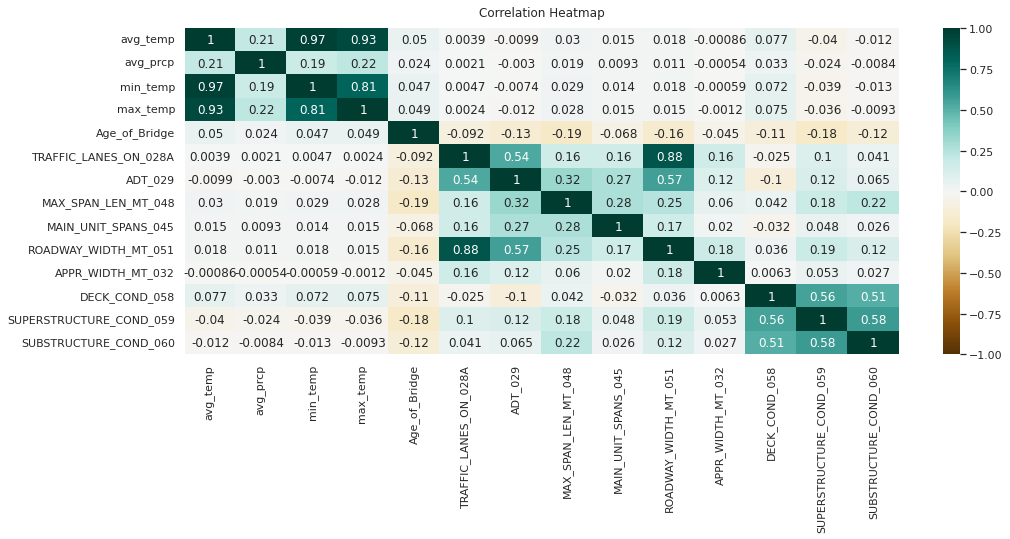

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df3_HI.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
np.triu(np.ones_like(df3_HI.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

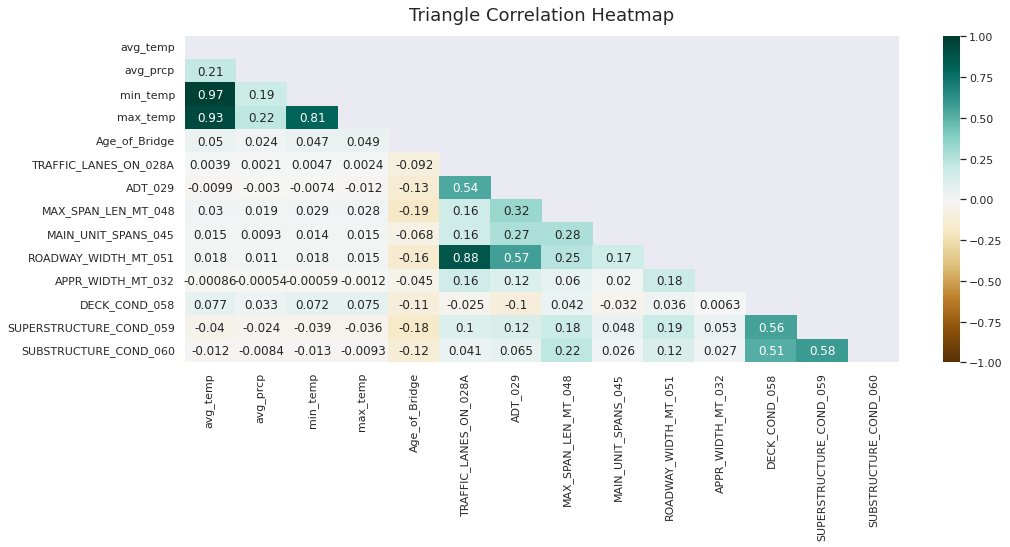

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df3_HI.corr(), dtype=np.bool))
heatmap = sns.heatmap(df3_HI.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
KA = []
ivector= []
for i in range(0,150,10): # Age of Bridge
      pred_i = model.predict(np.array([i,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA.append(pred_i)
      ivector.append(i)
      print(i,pred_i)

0 7.0
10 7.0
20 7.0
30 7.0
40 7.0
50 7.0
60 7.0
70 7.0
80 7.0
90 7.0
100 7.0
110 7.0
120 7.0
130 7.0
140 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

In [ ]:
KA1 = []
jvector = []
for j in range(0,500000,5000): # Average Daily Traffic
      pred_j = model.predict(np.array([50,4,j,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA1.append(pred_j)
      jvector.append(j)
      print(j,pred_j)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

0 6.0
5000 7.0
10000 7.0
15000 7.0
20000 7.0
25000 7.0
30000 7.0
35000 7.0
40000 7.0
45000 7.0
50000 7.0
55000 7.0
60000 7.0
65000 7.0
70000 7.0
75000 7.0
80000 7.0
85000 7.0
90000 7.0
95000 7.0
100000 7.0
105000 7.0
110000 7.0
115000 7.0
120000 7.0
125000 7.0
130000 7.0
135000 7.0
140000 7.0
145000 7.0
150000 7.0
155000 7.0
160000 7.0
165000 7.0
170000 7.0
175000 7.0
180000 7.0
185000 7.0
190000 7.0
195000 7.0
200000 7.0
205000 7.0
210000 7.0
215000 7.0
220000 7.0
225000 7.0
230000 7.0
235000 7.0
240000 7.0
245000 7.0
250000 7.0
255000 7.0
260000 7.0
265000 7.0
270000 7.0
275000 7.0
280000 7.0
285000 7.0
290000 7.0
295000 7.0
300000 7.0
305000 7.0
310000 7.0
315000 7.0
320000 7.0
325000 7.0
330000 7.0
335000 7.0
340000 7.0
345000 7.0
350000 7.0
355000 7.0
360000 7.0
365000 7.0
370000 7.0
375000 7.0
380000 7.0
385000 7.0
390000 7.0
395000 7.0
400000 7.0
405000 7.0
410000 7.0
415000 7.0
420000 7.0
425000 7.0
430000 7.0
435000 7.0
440000 7.0
445000 7.0
450000 7.0
455000 7.0
460000 7.0
46

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

In [ ]:
KA2 = []
kvector=[]
for k in range(0,55,5): # Average Precipitation
      pred_k = model.predict(np.array([50,2,30000,50,25,15,10,50,k,30,85]).reshape(1,-1))[0]
      KA2.append(pred_k)
      kvector.append(k)
      print(k,pred_k)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0
50 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

In [ ]:
KA3 = []
lvector = []
for l in range(0,95,5): # Average Temperature
      pred_l = model.predict(np.array([50,2,30000,50,25,15,10,l,40,30,85]).reshape(1,-1))[0]
      KA3.append(pred_l)
      lvector.append(l)
      print(l,pred_l)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0
50 7.0
55 7.0
60 7.0
65 7.0
70 7.0
75 7.0
80 7.0
85 7.0
90 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

In [ ]:
KA4 = []
hvector=[]
for h in range(0,150,10): # Age of Bridge
      pred_h = model1.predict(np.array([h,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA4.append(pred_h)
      hvector.append(h)
      print(h,pred_h)

0 7.0
10 7.0
20 7.0
30 7.0
40 7.0
50 7.0
60 7.0
70 7.0
80 7.0
90 7.0
100 7.0
110 7.0
120 7.0
130 7.0
140 7.0


In [ ]:
KA5 = []
mvector=[]
for m in range(0,500000,5000): # Average Daily Traffic
      pred_m = model1.predict(np.array([50,4,m,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA5.append(pred_m)
      mvector.append(m)
      print(m,pred_m)

0 7.0
5000 7.0
10000 7.0
15000 7.0
20000 7.0
25000 7.0
30000 7.0
35000 7.0
40000 7.0
45000 7.0
50000 7.0
55000 7.0
60000 7.0
65000 7.0
70000 7.0
75000 7.0
80000 7.0
85000 7.0
90000 7.0
95000 7.0
100000 7.0
105000 7.0
110000 7.0
115000 7.0
120000 7.0
125000 7.0
130000 7.0
135000 7.0
140000 7.0
145000 7.0
150000 7.0
155000 7.0
160000 7.0
165000 7.0
170000 7.0
175000 7.0
180000 7.0
185000 7.0
190000 7.0
195000 7.0
200000 7.0
205000 7.0
210000 7.0
215000 7.0
220000 7.0
225000 7.0
230000 7.0
235000 7.0
240000 7.0
245000 7.0
250000 7.0
255000 7.0
260000 7.0
265000 7.0
270000 7.0
275000 7.0
280000 7.0
285000 7.0
290000 7.0
295000 7.0
300000 7.0
305000 7.0
310000 7.0
315000 7.0
320000 7.0
325000 7.0
330000 7.0
335000 7.0
340000 7.0
345000 7.0
350000 7.0
355000 7.0
360000 7.0
365000 7.0
370000 7.0
375000 7.0
380000 7.0
385000 7.0
390000 7.0
395000 7.0
400000 7.0
405000 7.0
410000 7.0
415000 7.0
420000 7.0
425000 7.0
430000 7.0
435000 7.0
440000 7.0
445000 7.0
450000 7.0
455000 7.0
460000 7.0
46

In [ ]:
KA6 = []
nvector=[]
for n in range(0,50,5): # Average Precipitation
      pred_n = model1.predict(np.array([50,2,30000,50,25,15,10,50,n,30,85]).reshape(1,-1))[0]
      KA6.append(pred_n)
      nvector.append(n)
      print(n,pred_n)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0


In [ ]:
KA7 = []
tvector=[]
for t in range(0,95,5): # Average Temperature
      pred_t = model1.predict(np.array([50,2,30000,50,25,15,10,t,40,30,85]).reshape(1,-1))[0]
      KA7.append(pred_t)
      tvector.append(t)
      print(t,pred_t)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0
50 7.0
55 7.0
60 7.0
65 7.0
70 7.0
75 7.0
80 7.0
85 7.0
90 7.0


In [ ]:
KA8 = []
uvector = []
for u in range(0,150,10): # Age of Bridge
      pred_u = model2.predict(np.array([u,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA8.append(pred_u)
      uvector.append(u)
      print(u,pred_u)

0 7.0
10 7.0
20 7.0
30 7.0
40 7.0
50 7.0
60 7.0
70 7.0
80 7.0
90 7.0
100 7.0
110 7.0
120 7.0
130 7.0
140 7.0


In [ ]:
KA9 = []
yvector=[]
for y in range(0,500000,5000): # Average Daily Traffic
      pred_y = model2.predict(np.array([50,4,y,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA9.append(pred_y)
      yvector.append(y)
      print(y,pred_y)

0 7.0
5000 7.0
10000 7.0
15000 7.0
20000 7.0
25000 7.0
30000 7.0
35000 7.0
40000 7.0
45000 7.0
50000 7.0
55000 7.0
60000 7.0
65000 7.0
70000 7.0
75000 7.0
80000 7.0
85000 7.0
90000 7.0
95000 7.0
100000 7.0
105000 7.0
110000 7.0
115000 7.0
120000 7.0
125000 7.0
130000 7.0
135000 7.0
140000 7.0
145000 7.0
150000 7.0
155000 7.0
160000 7.0
165000 7.0
170000 7.0
175000 7.0
180000 7.0
185000 7.0
190000 7.0
195000 7.0
200000 7.0
205000 7.0
210000 7.0
215000 7.0
220000 7.0
225000 7.0
230000 7.0
235000 7.0
240000 7.0
245000 7.0
250000 7.0
255000 7.0
260000 7.0
265000 7.0
270000 7.0
275000 7.0
280000 7.0
285000 7.0
290000 7.0
295000 7.0
300000 7.0
305000 7.0
310000 7.0
315000 7.0
320000 7.0
325000 7.0
330000 7.0
335000 7.0
340000 7.0
345000 7.0
350000 7.0
355000 7.0
360000 7.0
365000 7.0
370000 7.0
375000 7.0
380000 7.0
385000 7.0
390000 7.0
395000 7.0
400000 7.0
405000 7.0
410000 7.0
415000 7.0
420000 7.0
425000 7.0
430000 7.0
435000 7.0
440000 7.0
445000 7.0
450000 7.0
455000 7.0
460000 7.0
46

In [ ]:
KA10 = []
xvector=[]
for x in range(0,50,5): # Average Precipitation
      pred_x = model2.predict(np.array([50,2,30000,50,25,15,10,50,x,30,85]).reshape(1,-1))[0]
      KA10.append(pred_x)
      xvector.append(x)
      print(x,pred_x)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0


In [ ]:
KA11 = []
zvector=[]
for z in range(0,95,5): # Average Temperature
      pred_z = model2.predict(np.array([50,2,30000,50,25,15,10,z,40,30,85]).reshape(1,-1))[0]
      KA11.append(pred_z)
      zvector.append(z)
      print(z,pred_z)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0
50 7.0
55 7.0
60 7.0
65 7.0
70 7.0
75 7.0
80 7.0
85 7.0
90 7.0


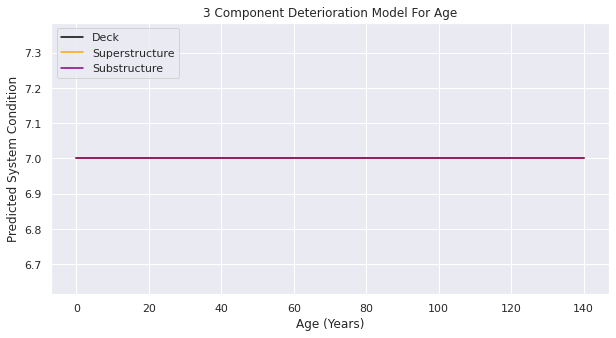

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(ivector, KA, color ='black',label = "Deck")
plt.plot(hvector, KA4, color ='orange',label = "Superstructure")
plt.plot(uvector, KA8, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Age (Years)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Age")
plt.show()

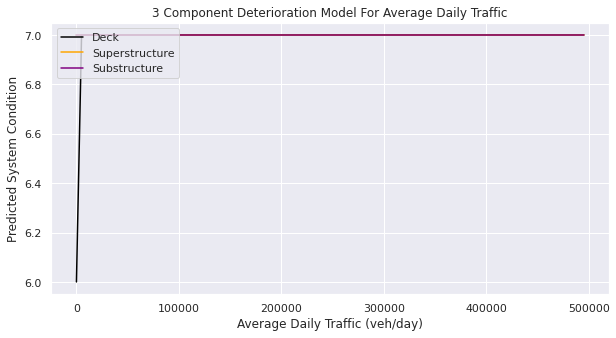

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(jvector, KA1, color ='black',label = "Deck")
plt.plot(mvector, KA5, color ='orange',label = "Superstructure")
plt.plot(yvector, KA9, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Average Daily Traffic")
plt.show()

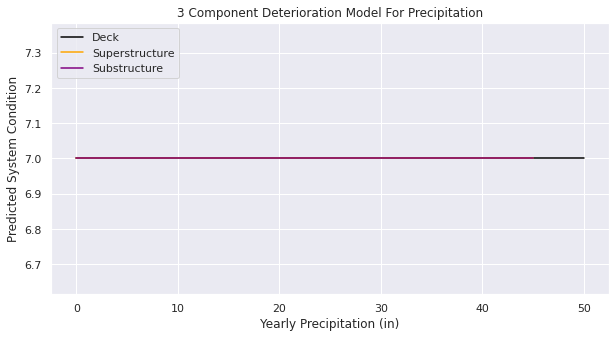

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(kvector, KA2, color ='black',label = "Deck")
plt.plot(nvector, KA6, color ='orange',label = "Superstructure")
plt.plot(xvector, KA10, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Yearly Precipitation (in)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Precipitation")
plt.show()

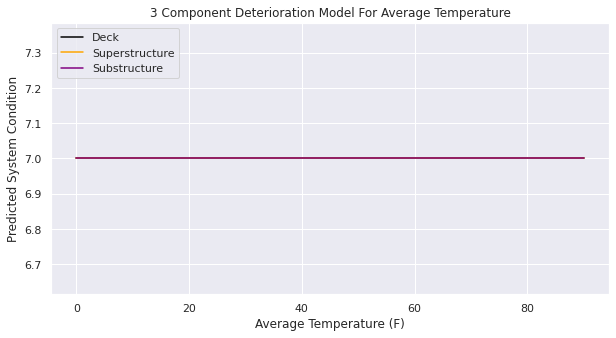

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(lvector, KA3, color ='black',label = "Deck")
plt.plot(tvector, KA7, color ='orange',label = "Superstructure")
plt.plot(zvector, KA11, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Average Temperature")
plt.show()

**Visualization of Current Deck and Superstructure Materials** 

In [ ]:
#Visualizing current deck structure parameters
#Deck structure type is 106,wearing surface is 107,membrane type is 108,deck protection is 109
Vis=pd.read_csv("Datafor555/HI/HI20.csv")
Vis.iloc[:,106]

0       N
1       1
2       1
3       1
4       1
       ..
1148    N
1149    1
1150    N
1151    1
1152    1
Name: DECK_STRUCTURE_TYPE_107, Length: 1153, dtype: object

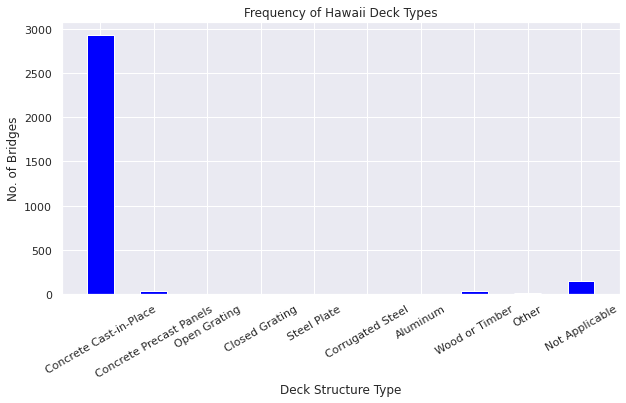

In [ ]:
Vis['DECK_STRUCTURE_TYPE_107'].value_counts()
# 1 Concrete Cast-in-Place 2 Concrete Precast Panels 3 Open Grating 4 Closed Grating 5 Steel plate 6 Corrugated Steel 7 Aluminum 8 Wood or Timber 9 Other N Not applicable
data_dict = {'Concrete Cast-in-Place':2926, 'Concrete Precast Panels':30, 'Open Grating':1, 'Closed Grating':0,'Steel Plate':3,'Corrugated Steel':3,'Aluminum':1,'Wood or Timber':31,'Other':6,'Not Applicable':152}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='blue',
        width = 0.5)
plt.xlabel("Deck Structure Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Hawaii Deck Types")
plt.show()

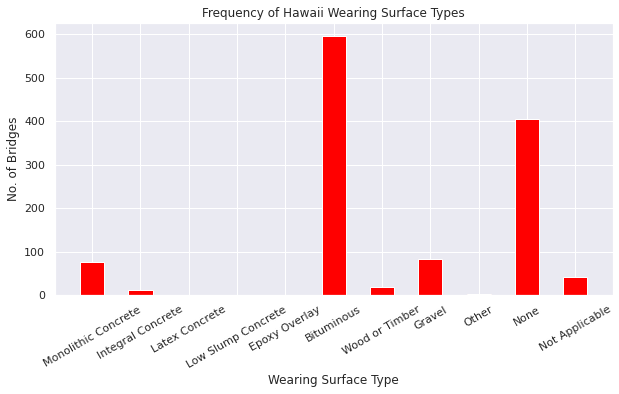

In [ ]:
Vis['SURFACE_TYPE_108A'].value_counts()
#1 Monolithic Concrete 2 Integral Concrete 3 Latex Concrete 4 Low Slump Concrete 5 Epoxy Overlay 6 Bituminous 7 Wood or Timber 8 Gravel 9 Other 0 None (no additional concrete thickness or N Not Applicable (applies only to structures
data_dict = {'Monolithic Concrete':77, 'Integral Concrete':12, 'Latex Concrete':0, 'Low Slump Concrete':0,'Epoxy Overlay':1,'Bituminous':596,'Wood or Timber':19,'Gravel':82,'Other':2, 'None':405,'Not Applicable':41}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='red',
        width = 0.5)
plt.xlabel("Wearing Surface Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Hawaii Wearing Surface Types")
plt.show()

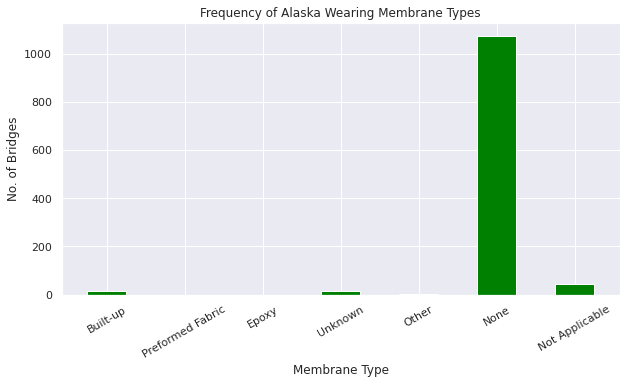

In [ ]:
Vis['MEMBRANE_TYPE_108B'].value_counts()
# 1 Built-up 2 Preformed Fabric 3 Epoxy 8 Unknown 9 Other 0 None N Not Applicable 
data_dict = {'Built-up':14, 'Preformed Fabric':0, 'Epoxy':0, 'Unknown':17,'Other':2,'None':1074,'Not Applicable':46}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='green',
        width = 0.5)
plt.xlabel("Membrane Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Alaska Wearing Membrane Types")
plt.show()

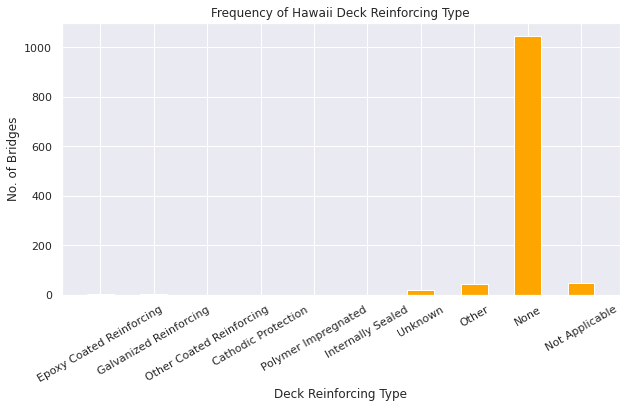

In [ ]:
Vis['DECK_PROTECTION_108C'].value_counts()
#1 Epoxy Coated Reinforcing 2 Galvanized Reinforcing 3 Other Coated Reinforcing 4 Cathodic Protection 6 Polymer Impregnated 7 Internally Sealed8 Unknown 9 Other 0 None N Not Applicable
data_dict = {'Epoxy Coated Reinforcing':1, 'Galvanized Reinforcing':1, 'Other Coated Reinforcing':0, 'Cathodic Protection':0,'Polymer Impregnated':0,'Internally Sealed':0,'Unknown':17,'Other':41,'None':1047,'Not Applicable':46}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='orange',
        width = 0.5)
plt.xlabel("Deck Reinforcing Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Hawaii Deck Reinforcing Type")
plt.show()

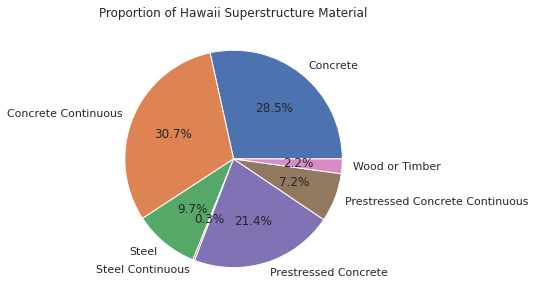

In [ ]:
#Superstructure material Material is 47, structure type is 48
import matplotlib.pyplot as plt
Vis['STRUCTURE_KIND_043A'].value_counts()
#1 Concrete 2 Concrete continuous 3 Steel 4 Steel continuous 5 Prestressed concrete * 6 Prestressed concrete continuous * 7 Wood or Timber 8 Masonry 9 Aluminum, Wrought Iron, or Cast Iron 0 Other
data_dict={'Concrete':326,'Concrete Continuous':352,'Steel':111,'Steel Continuous':3,'Prestressed Concrete':245,'Prestressed Concrete Continuous':83,'Wood or Timber':25}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.pie(values, labels=types,autopct='%1.1f%%')
plt.title("Proportion of Hawaii Superstructure Material")
plt.show()